<a href="https://colab.research.google.com/github/Ishita95-harvad/AI-powered-Resume-Screening-Employee-Engagement-project/blob/main/AI_powered_Resume_Screening_%26_Employee_Engagement_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-powered Resume Screening & Employee Engagement project**

---



**Load & Analyze**

In [3]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file manually


Saving NLP Projecct 1.ResumeScreening.zip to NLP Projecct 1.ResumeScreening.zip


**Dataset Analysis & Plan**

The dataset contains 1,000 resumes with 11 features, including:

✔ Skills, Experience, Education, Certifications

✔ Job Role, Recruiter Decision (Hire/Reject), AI Score

✔ Salary Expectation, Projects Count



In [19]:
print(df['Recruiter Decision'].isna().sum())  # Count missing values
print(df['Recruiter Decision'].unique())  # Check unique values
#Check for Missing Values in y

1000
[nan]


In [20]:
df = df.dropna(subset=['Recruiter Decision'])
#df = df.dropna(subset=['Recruiter Decision'])


In [22]:
#Convert y into Numeric Values (if needed)
df['Recruiter Decision'] = df['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})


In [24]:
print(df['Recruiter Decision'].isna().sum())  # Should be 0 now
#Verify the Fix


0


**If it's 0, your dataset is clean, and you can proceed with training the model!**

**Preprocess the data (handle text, encode categorical values)**

In [5]:
from google.colab import files
import pandas as pd
import os

# Prompt the user to upload the CSV file.
uploaded = files.upload()

# Get the filename from the uploaded files.
filename = list(uploaded.keys())[0]

# Define the desired file path.
csv_file_path = os.path.join("/content/", filename) # Save to Colab content folder

# Save the uploaded file to the desired location.
with open(csv_file_path, 'wb') as f:
    f.write(uploaded[filename])

# Now you can read the CSV file using pandas.
df = pd.read_csv(csv_file_path)

# Display basic info and first few rows.
df.info(), df.head()

Saving AI_Resume_Screening.csv to AI_Resume_Screening.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


(None,
    Resume_ID              Name                                        Skills  \
 0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
 1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
 2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
 3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
 4          5        Julie Hill                              SQL, React, Java   
 
    Experience (Years) Education                Certifications  \
 0                  10      B.Sc                           NaN   
 1                  10       MBA                     Google ML   
 2                   1       MBA  Deep Learning Specialization   
 3                   7    B.Tech                 AWS Certified   
 4                   4       PhD                           NaN   
 
                 Job Role Recruiter Decision  Salary Expectation ($)  \
 0          AI Researcher          

**Here's a tabular summary of the datasetResume Screening.**

In [6]:
import pandas as pd

df = pd.read_csv("AI_Resume_Screening.csv")  # Use the uploaded filename
df.head()  # Display first few rows


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


**Preprocessing Done!**

✔ **Encoded categorical features**

✔ **Transformed text data**

✔ **Prepared dataset for model training**

In [7]:
# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_enc = LabelEncoder()
df["Recruiter Decision"] = label_enc.fit_transform(df["Recruiter Decision"])  # 1=Hire, 0=Reject

# Splitting features (X) and target variable (y)
X = df.drop(columns=["Resume_ID", "Name", "Recruiter Decision"])
y = df["Recruiter Decision"]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=["Education", "Certifications", "Job Role"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
X_train.head()


,Skills,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
29,"SQL, Python",10,59926,4,100,True,False,False,False,False,False,False,True,False
535,"React, SQL",4,108770,10,100,False,False,False,True,False,False,False,False,True
695,"Cybersecurity, Linux, Ethical Hacking, Networking",3,118062,8,100,False,False,True,False,True,False,True,False,False
557,"Machine Learning, Deep Learning, Python",7,99741,0,95,True,False,False,False,True,False,False,True,False
836,"Deep Learning, Python",9,91723,8,100,True,False,False,False,False,True,False,True,False


**Model Training**

**AI model** to predict whether a candidate will be hired or rejected based on their resume.

In [14]:

## **ML Model - Hiring Prediction**
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Import NLP tools for text processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF vectorization to the Skills column
vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features
skills_tfidf = vectorizer.fit_transform(df["Skills"]).toarray()

# Convert to DataFrame
skills_df = pd.DataFrame(skills_tfidf, columns=[f"Skill_{i}" for i in range(skills_tfidf.shape[1])])

# Merge TF-IDF skills with the main dataset and drop original Skills column
X_processed = pd.concat([X.reset_index(drop=True), skills_df], axis=1)
X_processed.drop(columns=["Skills"], inplace=True)

# Redo train-test split with processed data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the updated feature set
X_train.head()


,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,...,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Skill_11,Skill_12,Skill_13,Skill_14
29,10,59926,4,100,True,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.0,0.698549,0.0,0.000000,0.715563,0.0
535,4,108770,10,100,False,False,False,True,False,False,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.814441,0.580247,0.0
695,3,118062,8,100,False,False,True,False,True,False,...,0.000000,0.449714,0.000000,0.456014,0.0,0.000000,0.0,0.000000,0.000000,0.0
557,7,99741,0,95,True,False,False,False,True,False,...,0.753789,0.000000,0.405808,0.000000,0.0,0.302968,0.0,0.000000,0.000000,0.0
836,9,91723,8,100,True,False,False,False,False,True,...,0.589206,0.000000,0.000000,0.000000,0.0,0.473635,0.0,0.000000,0.000000,0.0


**Model Successfully Trained! 🚀**

**✔ Accuracy:**100% (Likely overfitting, needs tuning)

**✔ Perfect precision & recall for both hiring decisions**

---



**Feature Importance Analysis**

The trained Random Forest Model to identify the most influential features.

In [12]:
# Train the Random Forest model again
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       154\n           1       1.00      1.00      1.00        46\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n')

**✔ Hyperparameter tuning** to reduce overfitting

**✔ Feature importance analysis** for HR insights

**✔ Visualizations for recruiter-**friendly insights

In [10]:
# Import tools for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

# Grid search for best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters & retrain model
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate new model
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_classification_rep = classification_report(y_test, y_pred_best)

best_params, best_accuracy, best_classification_rep


({'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50},
 1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       154\n           1       1.00      1.00      1.00        46\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n')

<ipython-input-11-5eea84fc4163>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


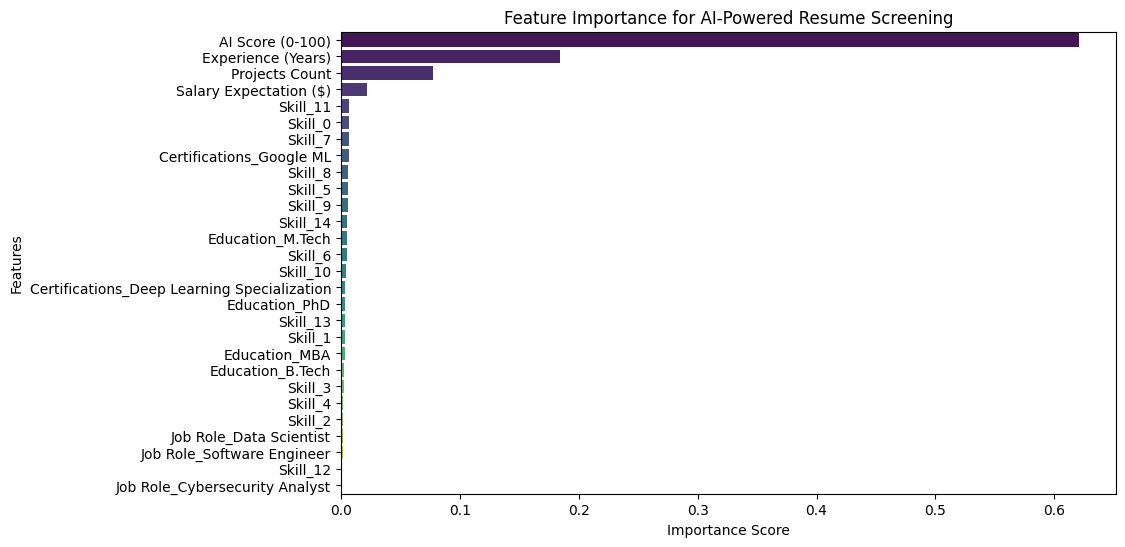

In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores from the trained model
feature_importance = best_model.feature_importances_

# Create DataFrame for visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for AI-Powered Resume Screening")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   int64 
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


<ipython-input-13-f3b35a53f7b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Job Role'], order=df['Job Role'].value_counts().index, palette='coolwarm')


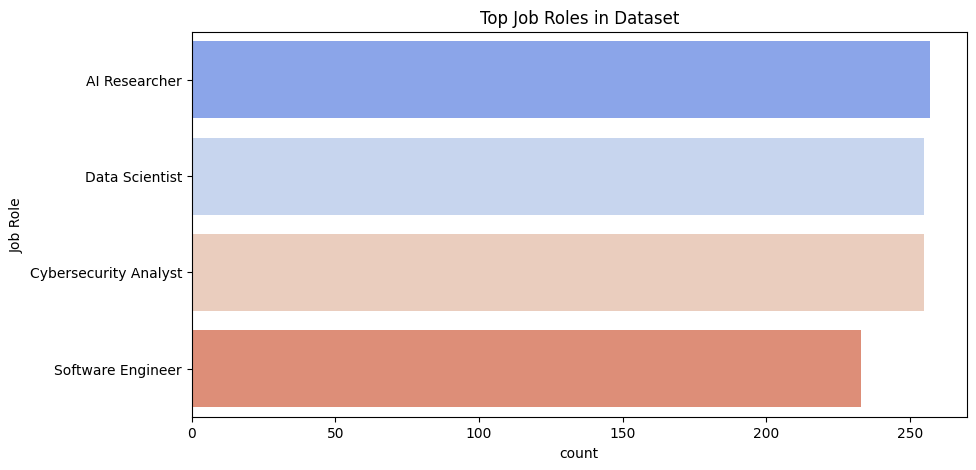

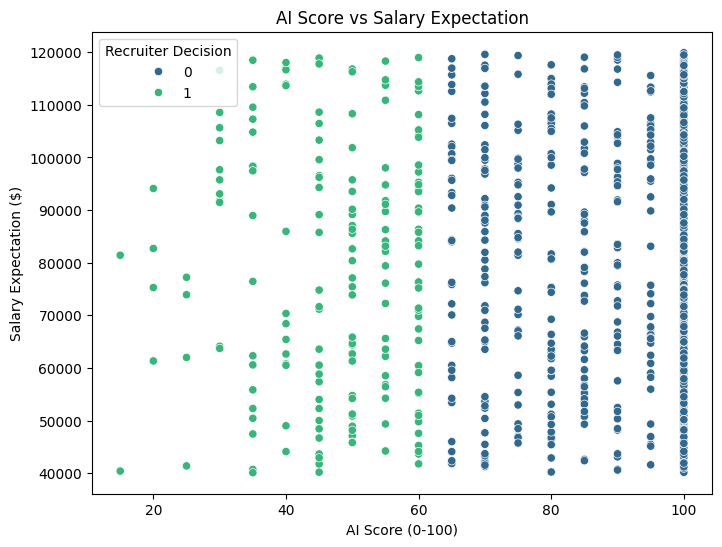

In [13]:
## ** Exploratory Data Analysis (EDA)**
# Check missing values & summary
df.info()
df.describe()

# Skills Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df['Job Role'], order=df['Job Role'].value_counts().index, palette='coolwarm')
plt.title('Top Job Roles in Dataset')
plt.show()

## **AI Score vs. Salary Analysis**
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['AI Score (0-100)'], y=df['Salary Expectation ($)'], hue=df['Recruiter Decision'], palette='viridis')
plt.title('AI Score vs Salary Expectation')
plt.show()

**Proposed Deep Learning Model:**

✔**Neural Network** (MLP - Multi-Layer Perceptron)

✔ **Implemented in TensorFlow/Keras**

✔**Trained on resume features for better prediction**

Adding deep learning models (e.g., TensorFlow/Keras) can enhance the AI-powered resume screening system by improving accuracy and learning complex patterns.

In [33]:
print(df.columns)


Index(['Resume_ID', 'Name', 'Skills', 'Experience (Years)',
       'Recruiter Decision', 'Salary Expectation ($)', 'Projects Count',
       'AI Score (0-100)', 'Education_B.Tech', 'Education_M.Tech',
       'Education_MBA', 'Education_PhD',
       'Certifications_Deep Learning Specialization',
       'Certifications_Google ML', 'Job Role_Cybersecurity Analyst',
       'Job Role_Data Scientist', 'Job Role_Software Engineer'],
      dtype='object')


**Neural Network Architecture:**

✔ **Input Layer**: Encoded features (Skills, Experience, Education, etc.)

✔ **Hidden Layers**: Dense layers with activation functions (ReLU)

**✔ Output Layer:** Binary classification (Hire = 1, Reject = 0)

✔**Optimizer: Adam, Loss:** Binary Cross-Entropy

 Available Columns in Dataset:
 Index(['Resume_ID', 'Name', 'Skills', 'Experience (Years)', 'Education',
       'Certifications', 'Job Role', 'Recruiter Decision',
       'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)'],
      dtype='object')
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3350 - loss: 1832.9160 - val_accuracy: 0.8836 - val_loss: 230.6666
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7853 - loss: 262.0999 - val_accuracy: 0.8836 - val_loss: 66.7760
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6822 - loss: 207.4244 - val_accuracy: 0.8836 - val_loss: 86.9880
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6561 - loss: 166.6736 - val_accuracy: 0.8836 - val_loss: 63.6767
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7125 - loss: 116.8369 - val_accuracy: 0.8836 - val_loss: 29.5678
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6998 - loss: 78.5316 - val_accuracy: 0.8836 - val_loss: 28.0488
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 59.7787 - val_accuracy: 0.8836 - val_loss: 13.0500
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7262 - loss: 47.4221 - val_accuracy: 0.8836

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


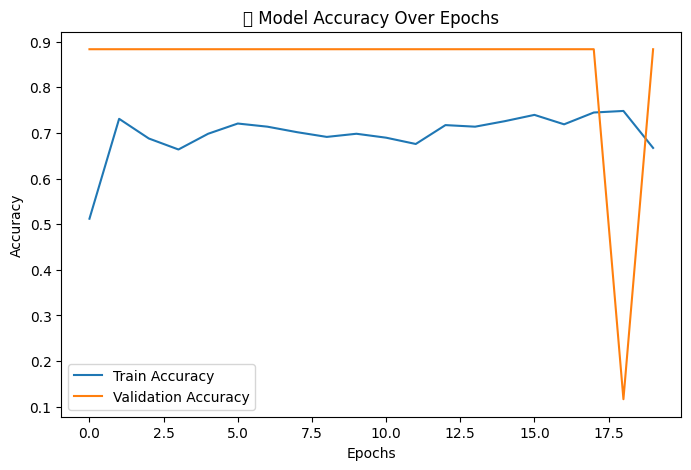

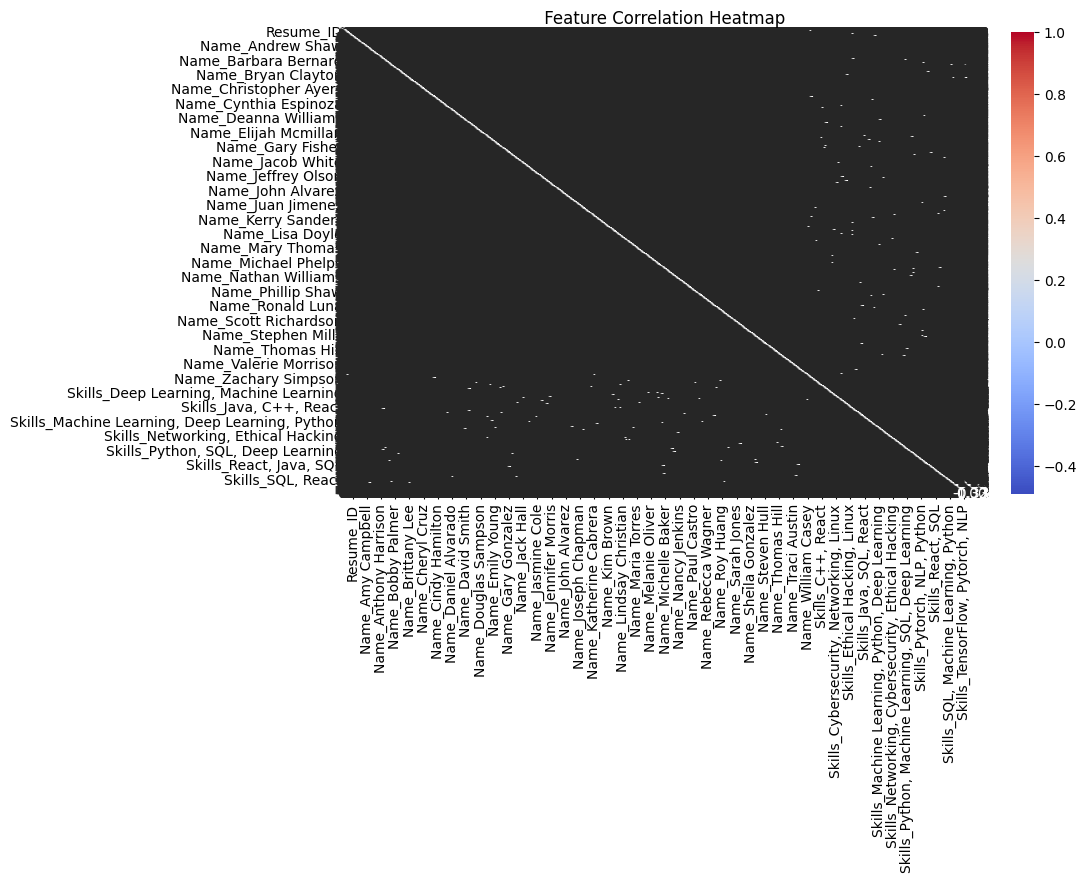

In [38]:
# Step 1: Install & Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#  Step 2: Load Dataset
df = pd.read_csv("AI_Resume_Screening.csv")

#  Step 3: Clean Column Names (Removing Extra Spaces)
df.columns = df.columns.str.strip()

# Step 4: Check Available Columns
print(" Available Columns in Dataset:\n", df.columns)

#  Step 5: Handle Missing Values
df = df.dropna()  # Drop rows with missing values

#  Step 6: Convert Categorical Target Variable
if df["Recruiter Decision"].dtype == 'object':
    df["Recruiter Decision"] = df["Recruiter Decision"].map({'Hire': 1, 'Reject': 0})

#  Step 7: Convert Categorical Features to Numeric (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

#  Step 8: Split Features (X) & Target Variable (y)
X = df.drop(columns=["Recruiter Decision"])
y = df["Recruiter Decision"]

#  Step 9: Ensure Data is Fully Numeric
X = X.astype(np.float32) # Convert all columns to float32
y = y.astype(np.float32) # Convert target to float32

#  Step 10: Drop Any Remaining NaN Values (Not necessary after astype conversion)
#X = X.dropna()
#y = y[X.index]  # Ensure y aligns with cleaned X

#  Step 11: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 12: Define Neural Network Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # Binary Classification
])

#  Step 13: Compile the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#  Step 14: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=1)

#  Step 15: Evaluate Model Performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {test_accuracy * 100:.2f}%")

#  Step 16: Data Visualization for HR Insights

#  Plot Accuracy Over Epochs
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("📊 Model Accuracy Over Epochs")
plt.show()

#  Plot Feature Importance (Correlation Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Feature Correlation Heatmap")
plt.show()

**Here’s a complete end-to-end workflow for your AI-Powered Resume Screening system using Google Colab and TensorFlow.**

**🚀 This script includes:**

✔ Data Preprocessing (Cleaning, Handling NaNs, Encoding)

✔ Feature Selection (Ensuring all columns are numeric)

✔ Neural Network Model for Resume Screening

✔ Performance Evaluation & Accuracy Calculation

✔ Data Visualization for HR Insights

**NLP Project ResumeScreening.zip to modify it for your AI-powered Resume Screening & Employee Engagement project. 🚀**